In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import datetime as dt

In [2]:
start = time.process_time()

In [3]:
#Load DataFrame, Change Date back to Datetime Index
df = pd.read_csv('/Users/josephbrennan/Desktop/Data/Merged/bae_merged.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.index = pd.DatetimeIndex(df.Date)
table_dates = df.Date
df.drop('Date', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,government,aircraft,Airbus,defence,BAE Systems,aerospace
Date,,,,,,,,,,,
2017-01-03,475.803110,480.629515,472.585506,475.400909,6012671,68,86,91,81,64,71
2017-01-04,475.400868,476.607469,468.161261,470.574463,8970946,74,88,75,82,51,78
2017-01-05,469.769956,474.194159,468.563355,472.585358,5603166,75,80,81,85,51,74
2017-01-06,471.781061,487.466876,471.479411,486.662476,9658212,75,100,74,82,40,79
2017-01-09,488.271294,490.282296,477.009682,480.629486,9031370,80,92,86,88,57,58


In [4]:
#DataFrame Shape
df.shape

(1135, 11)

In [5]:
#Check for Null
df.isna().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
government     0
aircraft       0
Airbus         0
defence        0
BAE Systems    0
aerospace      0
dtype: int64

In [6]:
#Last row of data used to predict
compare_price = df.tail(1)
compare_price

,Open,High,Low,Close,Volume,government,aircraft,Airbus,defence,BAE Systems,aerospace
Date,,,,,,,,,,,
2021-06-29,525.0,527.315002,522.200012,523.400024,5507683,95,92,83,86,53,79


In [7]:
#Get all data except last row (actual_price)
df = df.head(len(df)-1)
df

,Open,High,Low,Close,Volume,government,aircraft,Airbus,defence,BAE Systems,aerospace
Date,,,,,,,,,,,
2017-01-03,475.803110,480.629515,472.585506,475.400909,6012671,68,86,91,81,64,71
2017-01-04,475.400868,476.607469,468.161261,470.574463,8970946,74,88,75,82,51,78
2017-01-05,469.769956,474.194159,468.563355,472.585358,5603166,75,80,81,85,51,74
2017-01-06,471.781061,487.466876,471.479411,486.662476,9658212,75,100,74,82,40,79
2017-01-09,488.271294,490.282296,477.009682,480.629486,9031370,80,92,86,88,57,58
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,539.799988,541.799988,535.799988,538.200012,3922952,92,88,84,87,66,89
2021-06-23,540.000000,540.200012,532.799988,532.799988,4533214,92,95,81,94,44,74
2021-06-24,534.799988,536.000000,529.799988,533.599976,4007860,97,90,77,95,64,81


In [8]:
#Save Feature Columns
feature_list = list(df.columns)
feature_list.remove('Close')
feature_list

['Open',
 'High',
 'Low',
 'Volume',
 'government',
 'aircraft',
 'Airbus',
 'defence',
 'BAE Systems',
 'aerospace']

In [9]:
df = pd.get_dummies(df)

In [10]:
#Features (X) and Labels (y)
y = df.iloc[:, 3].values
X = df.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]].values

In [11]:
#Model Training, Test Size Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(793, 10)
(341, 10)
(793,)
(341,)


In [12]:
#Random Forest Regression
model = RandomForestRegressor(n_estimators = 200, bootstrap=True)
"""model = RandomForestRegressor(n_estimators = 800, 
                              min_samples_split = 2,
                              min_samples_leaf = 1,
                              max_features = 'auto',
                              max_depth = 100,
                              bootstrap=True)
"""
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
#Correct Price 29/06/2021
actual_price = compare_price.iloc[0,3]
print(actual_price)

523.4000244140625


In [14]:
#Predicted Price 29/06/2021
compare_price.drop('Close', axis=1, inplace=True)
next_day_price = model.predict(compare_price)
print(next_day_price)

[524.56163483]


In [15]:
#Model Evaluation Scores
from sklearn import metrics

print('R-squared score: ', round(model.score(X_test, y_test), 3))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 3))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred), 3)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', round(100*(1 - mape), 2))

R-squared score:  0.964
Mean Absolute Error: 4.302
Mean Absolute Percentage Error (MAPE): 0.9
Mean Squared Error: 37.37309920054885 3
Root Mean Squared Error: 6.11335416940233
Accuracy: 99.1


In [16]:
#Check Importance of Variables
importances = list(model.feature_importances_)

In [17]:
#Zip features and their importance
feature_importance = [(feature, round(importance, 2)) 
                      for feature, importance in 
                      zip(compare_price, importances)]

In [18]:
#Sort Features
feature_importance = sorted(feature_importance, 
                                key = lambda x: x[1], 
                                reverse = True)

In [19]:
#Print Feature Importance
for feature, importance in feature_importance:
    print(f'Variable: {feature} \tImportance: {importance}')

Variable: High 	Importance: 0.8
Variable: Low 	Importance: 0.19
Variable: Open 	Importance: 0.0
Variable: Volume 	Importance: 0.0
Variable: government 	Importance: 0.0
Variable: aircraft 	Importance: 0.0
Variable: Airbus 	Importance: 0.0
Variable: defence 	Importance: 0.0
Variable: BAE Systems 	Importance: 0.0
Variable: aerospace 	Importance: 0.0


Text(0.5, 1.0, 'BT Variable Importances')

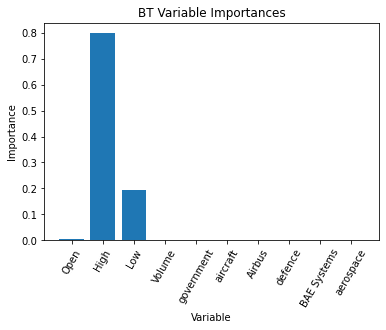

In [20]:
%matplotlib inline

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, compare_price, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable')
plt.xticks(rotation='60')
plt.title('BT Variable Importances')

In [21]:
dates = df.index
dates

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28'],
              dtype='datetime64[ns]', name='Date', length=1134, freq=None)

In [22]:
true_data =pd.DataFrame(data = {'date': dates, 'actual': y})
true_data

,date,actual
0,2017-01-03,475.400909
1,2017-01-04,470.574463
2,2017-01-05,472.585358
3,2017-01-06,486.662476
4,2017-01-09,480.629486
...,...,...
1129,2021-06-22,538.200012
1130,2021-06-23,532.799988
1131,2021-06-24,533.599976
1132,2021-06-25,535.000000


In [23]:
test_dates = table_dates[1-(len(y_pred)+1):]

In [24]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'predictions':y_pred})
predictions_data

,date,predictions
Date,,
2020-02-21,2020-02-21,582.719892
2020-02-24,2020-02-24,590.938639
2020-02-25,2020-02-25,591.330716
2020-02-26,2020-02-26,583.469686
2020-02-27,2020-02-27,573.692021
...,...,...
2021-06-23,2021-06-23,537.666964
2021-06-24,2021-06-24,535.482339
2021-06-25,2021-06-25,532.109060


In [25]:
prevThirtyDays = df.tail(30)
prevPrices = prevThirtyDays["Close"].values
variance = np.var(prevPrices)
print(variance)
std_dev = variance ** 0.5
std_dev

52.50588725070159


7.24609462060092

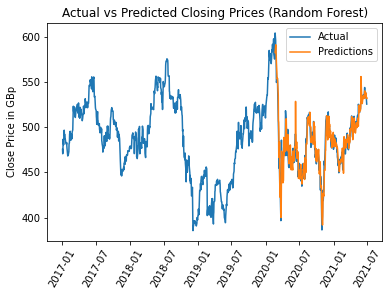

In [26]:
plt.plot(true_data['date'], true_data['actual'], label = 'Actual')
plt.plot(predictions_data['date'], predictions_data['predictions'], label='Predictions')
plt.xticks(rotation='60')
plt.ylabel("Close Price in GBp")
plt.title("Actual vs Predicted Closing Prices (Random Forest)")
plt.legend()
plt.show()

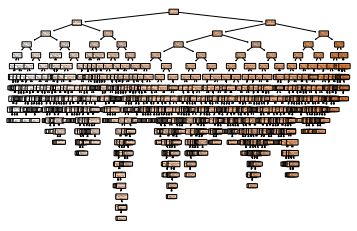

In [27]:
#Plot decision tree
from sklearn import tree

fig = tree.plot_tree(model.estimators_[0], feature_names=list(df), rounded=True, filled=True)

In [28]:
 print(time.process_time() - start)

46.114913
